In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from scipy.stats import f
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D


sns.set()

In [2]:
# load datasets

train_df_complete = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df_complete = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

In [3]:
# remove the first 'unnamed' column

train_df_complete = train_df_complete.iloc[:,1:]
test_df_complete = test_df_complete.iloc[:,1:]

In [4]:
# @title
# rename stuff according to this paper: https://www.sciencedirect.com/science/article/pii/S0098135414000969?via%3Dihub
'''
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

train_df_complete = train_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df_complete = test_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
'''

"\nX_dict = {\n'XMEAS_1':'A_feed_stream',\n'XMEAS_2':'D_feed_stream',\n'XMEAS_3':'E_feed_stream',\n'XMEAS_4':'Total_fresh_feed_stripper',\n'XMEAS_5':'Recycle_flow_into_rxtr',\n'XMEAS_6':'Reactor_feed_rate',\n'XMEAS_7':'Reactor_pressure',\n'XMEAS_8':'Reactor_level',\n'XMEAS_9':'Reactor_temp',\n'XMEAS_10':'Purge_rate',\n'XMEAS_11':'Separator_temp',\n'XMEAS_12':'Separator_level',\n'XMEAS_13':'Separator_pressure',\n'XMEAS_14':'Separator_underflow',\n'XMEAS_15':'Stripper_level',\n'XMEAS_16':'Stripper_pressure',\n'XMEAS_17':'Stripper_underflow',\n'XMEAS_18':'Stripper_temperature',\n'XMEAS_19':'Stripper_steam_flow',\n'XMEAS_20':'Compressor_work',\n'XMEAS_21':'Reactor_cooling_water_outlet_temp',\n'XMEAS_22':'Condenser_cooling_water_outlet_temp',\n'XMEAS_23':'Composition_of_A_rxtr_feed',\n'XMEAS_24':'Composition_of_B_rxtr_feed',\n'XMEAS_25':'Composition_of_C_rxtr_feed',\n'XMEAS_26':'Composition_of_D_rxtr_feed',\n'XMEAS_27':'Composition_of_E_rxtr_feed',\n'XMEAS_28':'Composition_of_F_rxtr_feed',\

In [5]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df_complete = train_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df_complete = test_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [6]:
# prepare dataset
# only use simulation run 1 for training and testing
# only use fault type 1 for now
# CAN BE CHANGED LATER

train_df = train_df_complete[train_df_complete.simulationRun==300].iloc[:,3:]
test_df = test_df_complete[(test_df_complete.simulationRun==300) & (test_df_complete.faultNumber==3)].iloc[:,3:]


In [7]:
train_df_complete

,faultNumber,simulationRun,sample,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,500,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0,500,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0,500,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0,500,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [ ]:
train_df

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
149500,0.25169,3651.8,4522.4,9.2316,26.957,42.187,2704.5,74.006,120.40,0.33938,...,53.824,24.529,61.692,22.309,39.788,36.210,46.548,47.278,41.413,19.309
149501,0.25251,3666.4,4532.9,9.3279,27.220,42.299,2705.5,75.492,120.40,0.33881,...,53.697,24.448,62.011,22.601,39.857,36.117,47.373,47.386,40.936,17.882
149502,0.25138,3692.3,4498.1,9.4572,26.631,42.345,2704.8,75.245,120.39,0.33809,...,54.113,24.568,59.748,22.054,39.945,41.265,48.331,47.410,40.914,16.938
149503,0.25166,3667.6,4504.0,9.3986,26.897,42.499,2704.3,75.500,120.40,0.33728,...,54.042,24.540,63.332,22.133,40.043,36.182,52.014,47.376,40.779,17.343
149504,0.23705,3679.1,4450.3,9.3068,26.642,42.448,2706.6,75.217,120.42,0.34572,...,54.009,23.599,61.318,22.547,40.954,31.095,48.723,47.389,40.924,16.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.28035,3725.9,4531.4,9.2090,27.072,41.950,2709.6,74.734,120.41,0.30243,...,54.058,27.024,62.474,22.809,35.661,39.174,42.795,48.795,41.129,19.035
149996,0.20495,3709.2,4488.2,9.3923,26.848,42.603,2705.1,74.777,120.39,0.33470,...,54.511,20.098,60.788,22.551,39.577,42.573,49.992,48.720,41.314,17.512
149997,0.20440,3706.3,4510.2,9.2135,26.453,42.094,2704.1,75.387,120.40,0.33668,...,54.247,20.152,61.118,23.161,39.334,42.433,44.684,48.633,41.495,19.038
149998,0.20437,3631.4,4591.0,9.2725,26.703,42.202,2702.6,75.748,120.34,0.32684,...,54.568,20.439,60.283,22.444,38.067,39.408,43.947,48.568,40.779,20.048


In [ ]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
    # resets the index so that the dataframe start from 0, not some other weird number
    # this fixes the issue where the faulty dataframe would appear shifted far rightward
test_df

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25169,3651.8,4522.4,9.2316,26.957,42.187,2704.5,74.006,120.40,0.33938,...,53.824,24.529,61.692,22.309,39.788,36.210,46.548,47.278,41.413,19.309
1,0.25251,3666.4,4532.9,9.3279,27.220,42.299,2705.5,75.492,120.40,0.33881,...,53.697,24.448,62.011,22.601,39.857,36.117,47.373,47.386,40.936,17.882
2,0.25138,3692.3,4498.1,9.4572,26.631,42.345,2704.8,75.245,120.39,0.33809,...,54.113,24.568,59.748,22.054,39.945,41.265,48.331,47.410,40.914,16.938
3,0.25166,3667.6,4504.0,9.3986,26.897,42.499,2704.3,75.500,120.40,0.33728,...,54.042,24.540,63.332,22.133,40.043,36.182,52.014,47.376,40.779,17.343
4,0.23705,3679.1,4450.3,9.3068,26.642,42.448,2706.6,75.217,120.42,0.34572,...,54.009,23.599,61.318,22.547,40.954,31.095,48.723,47.389,40.924,16.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.28031,3725.9,4531.4,9.2090,27.072,41.950,2709.6,74.734,120.41,0.30242,...,54.059,27.021,62.474,22.810,35.660,39.174,42.795,48.795,41.205,19.035
496,0.20492,3709.2,4488.3,9.3922,26.848,42.603,2705.1,74.777,120.39,0.33469,...,54.511,20.094,60.787,22.552,39.576,42.573,49.992,48.719,41.396,17.512
497,0.20436,3706.3,4510.3,9.2135,26.453,42.094,2704.1,75.387,120.40,0.33667,...,54.248,20.149,61.118,23.161,39.333,42.433,44.684,48.632,41.570,19.038
498,0.20434,3631.4,4591.0,9.2725,26.703,42.202,2702.6,75.748,120.34,0.32684,...,54.569,20.436,60.282,22.445,38.066,39.408,43.947,48.566,40.859,20.049


In [ ]:
# generate control charts for all features
# plot the mean, upper limit and lower limit


fig, ax = plt.subplots(13,4, figsize=(30,90))

for i in range(train_df.shape[1]):

    x = train_df.iloc[:,i]
    mean = x.mean()
    std = x.std(ddof=1)

    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    x.plot(ax=ax.ravel()[i])

    ax.ravel()[i].axhline(mean, c='k')
    ax.ravel()[i].axhline(lowerlim, ls='--', c='r')
    ax.ravel()[i].axhline(upperlim, ls='--', c='r')
    ax.ravel()[i].set_title(train_df.columns[i])


Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Value')

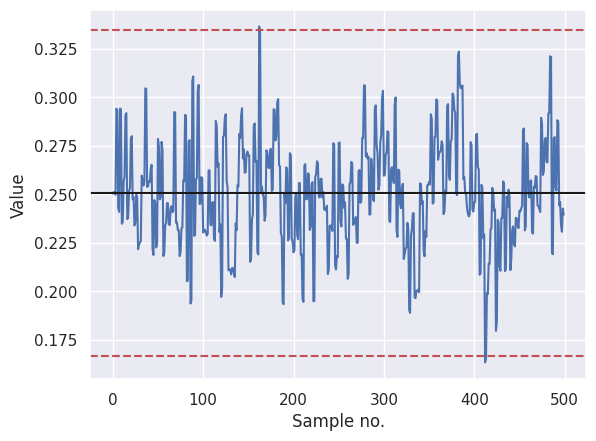

In [ ]:
just_plot_this = train_df.iloc[:,0]
mean = just_plot_this.mean()
std = just_plot_this.std()

lowerlim = mean - 3*std
upperlim = mean + 3*std

plt.plot(just_plot_this)
plt.axhline(y=mean, c='k')
plt.axhline(y=lowerlim, ls='--', c='r')
plt.axhline(y=upperlim, ls='--', c='r')

plt.xlabel('Sample no.')
plt.ylabel('Value')

In [ ]:
just_plot_this

0      0.25038
1      0.25109
2      0.25038
3      0.24977
4      0.29405
        ...   
495    0.24602
496    0.23457
497    0.23068
498    0.24263
499    0.23958
Name: xmeas_1, Length: 500, dtype: float64

In [ ]:
# visualize fault type 1 effects

fig, ax = plt.subplots(13,4, figsize=(30,90))

for i in range(train_df.shape[1]):

    x_faultfree = train_df.iloc[:,i]
    x_faulty = test_df.iloc[:,i]
    mean = x_faultfree.mean()
    std = x_faultfree.std(ddof=1)

    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    x_faultfree.plot(ax=ax.ravel()[i], alpha=0.5, label='fault-free')
    x_faulty.plot(ax=ax.ravel()[i], label='faulty', c='r')

    ax.ravel()[i].axhline(mean, c='k')
    ax.ravel()[i].axhline(lowerlim, ls='--', c='r')
    ax.ravel()[i].axhline(upperlim, ls='--', c='r')
    ax.ravel()[i].axvline(20, ls='--', c='g')
    ax.ravel()[i].set_title(train_df.columns[i])
    ax.ravel()[i].legend()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_df.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
train_df.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


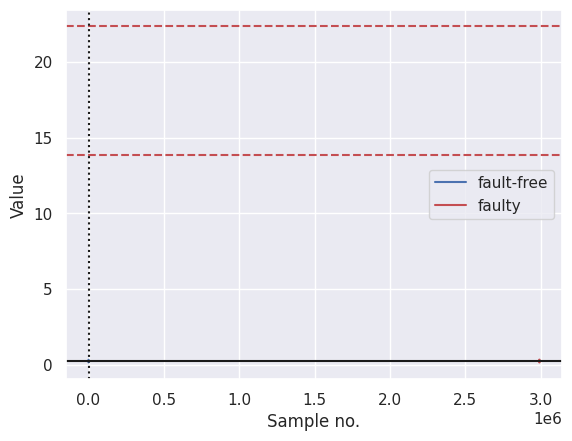

In [ ]:
good_data = train_df.iloc[:,0]
bad_data = test_df.iloc[:,0]
mean = good_data.mean()
std = good_data.std()

plt.plot(good_data, alpha=1, label='fault-free')
plt.plot(bad_data, c='r', label='faulty')
plt.axhline(y=mean, c='k')
plt.axhline(y=lowerlim, ls='--', c='r')
plt.axhline(y=upperlim, ls='--', c='r')
plt.axvline(x=20, ls='dotted', c='k')

plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.legend()



In [ ]:
test_df = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==2)].iloc[:,3:]
test_df.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Value')

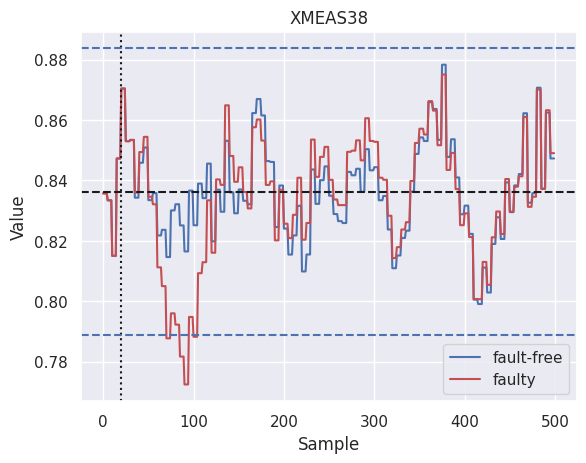

In [ ]:
colname = 'XMEAS38'

blue_data = train_df[colname]
mean = blue_data.mean()
std = blue_data.std()

red_data = test_df[colname]

plt.plot(blue_data, label='fault-free')
plt.plot(red_data, c='r', label='faulty')


plt.axhline(mean, c='k', ls='dashed')
plt.axvline(20, c='k', ls='dotted')
plt.axhline(mean+3*std, c='b', ls='dashed')
plt.axhline(mean-3*std, c='b', ls='dashed')
plt.legend()

plt.title(colname)
plt.xlabel('Sample')
plt.ylabel('Value')

In [ ]:
red_data

0      0.25038
1      0.25109
2      0.25038
3      0.24977
4      0.29405
        ...   
495    0.74559
496    0.73589
497    0.73200
498    0.74578
499    0.74273
Name: XMEAS1, Length: 500, dtype: float64

In [ ]:
class PCA:

    # here we go again

    def __init__(self, threshold=0.9):
        self.threshold = threshold
            # threshold is the desired explained variance

    def train(self, X, confidence_Q=0.99, confidence_T2=0.99, plot=True):
        # this function trains the model

        self.mu_train = X.mean(axis=0)
        self.sigma_train = X.std(axis=0)

        # standardize training data
        X = np.array(((X-self.mu_train)/self.sigma_train))

        # find the covariant matrix
        covX = np.cov(X, rowvar=False)
            # rowvar=False means that every column is a variable, and not a data point

        # find eigenvalues(L) and eigenvectors(P)
        # these are the principal component values and the principal component vectors, respectively
        self.L, self.P = np.linalg.eig(covX)

        # fractions of explained variance
        frac_expvar = self.L/np.sum(self.L)

        # cumulative fractions of explained variance
        frac_expvar_C = np.cumsum(self.L)/np.sum(self.L)

        # define number of components
        if self.threshold > 0 and self.threshold < 1:
            self.threshold = np.where(frac_expvar_C > self.threshold)[0][0] + 1
                # find the indices where threshold is greater than the cumulative fraction of explained variances
                # access the first index and add one
                # this gives the actual number of principal components required
                # why add 1? Because Python starts counting from 0, duh

                # this basically finds the smallest number of principal components required to explain the threshold fraction of variance

        # calculate detection limits for Hotelling T^2

        # use Fisher-Snedecor F distribution
        F = f.ppf(confidence_T2, self.threshold, X.shape[0] - self.threshold)
            # the PPF (Percent Point Function) tells you the value at which a certain percentage of the distribution lies to the left
        self.T2_lim = ((self.threshold*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-self.threshold)))*F
            # equation for control limit of Hotelling T^2 test

        # calculate detection limits for Q statistic
        theta = [np.sum(self.L[self.threshold:]**(i)) for i in (1, 2, 3)]
            # calculates three different sums for eigenvalues raised to the powers 1, 2 and 3
        h0 = 1 - ((2 * theta[0] * theta[2]) / (3 * (theta[1]**2)))
            # equation for control limit of Q-statistic
        n_alpha = norm.ppf(confidence_Q)
            # calculates the critical value for the normal distribution based on the confidence level
            # this is the z-score
        self.Q_lim = (theta[0]*(((n_alpha*np.sqrt(2*theta[1]*h0**2))/theta[0])+1+((theta[1]*h0*(h0-1))/theta[0]**2))**(1/h0))
            # control limit for the Q statistic's control chart

        if plot:
            fig, ax = plt.subplots()
            ax.bar(np.arange(len(frac_expvar)), frac_expvar)
            ax.plot(np.arange(len(frac_expvar)), frac_expvar_C)
            ax.axhline(y=0.9, ls='--', c='k')
            ax.axvline(x=29, ls='dotted', c=sns.color_palette()[0])
            ax.set_xlabel('Number of components')
            ax.set_ylabel('Variance of data')
            ax.set_title('PCA - Explained Variance')



    def predict(self, X):
        # for testing the model

        # standardize testing data
        # just like before
        X = np.array(((X-self.mu_train)/self.sigma_train))

        # calculate T^2 statistic again
        T = X@self.P[:,:self.threshold]
            # the @ operator does elementwise multiplication
            # selecting only the first self.threshold principal component vectors
            # T is a matrix where each row corresponds to an observation in the test data, and each column corresponds to a principal component score

        self.T2 = np.array([T[i,:]@np.linalg.inv(np.diag(self.L[:self.threshold]))@T[i,:].T for i in range(X.shape[0])])
            # calculate the T^2 statistic for each observation in the test data using the projection onto the principal components and the eigenvalues.
                # X.shape[0] is the number of observations (rows) in the test data
                # np.diag(self.L[:self.threshold]) creates a diagonal matrix using the selected eigenvalues. This matrix is used to form the denominators in the formula.
                # np.linalg.inv() calculates the inverse of the diagonal matrix. This is needed for the division in the next step.

        # calculate Q statistic
        # a similarly annoying equation indeed
        residual_error = X - X@self.P[:,:self.threshold]@self.P[:,:self.threshold].T
        self.Q = np.array([residual_error[i,:]@residual_error[i,:].T for i in range(X.shape[0])])

        # calculate the contributions of each variable in the test data to the Q statistic
        self.contributions = np.absolute(X * residual_error)

    def plot_control_charts(self, fault=None):

        fig, ax = plt.subplots(1,3, figsize=(20,4))
        plt.subplots_adjust(top=0.8)

        ax[0].semilogy(self.T2, '.')
        ax[0].axhline(self.T2_lim, ls='--', c='r')
        ax[0].set_title('$T^2$ Control Chart')
        ax[0].set_xlabel('Sample')
        ax[0].set_ylabel('$T^2$-statistic')

        ax[1].semilogy(self.Q, '.')
        ax[1].axhline(self.Q_lim, ls='--', c='r')
        ax[1].set_title('Q Control Chart')
        ax[1].set_xlabel('Sample')
        ax[1].set_ylabel('Q-statistic')


        # Plot Q vs T^2
        ax[2].plot(self.T2, self.Q, '.')
        ax[2].axhline(self.Q_lim, ls='--', c='r')
        ax[2].axvline(self.T2_lim, ls='--', c='r')
        ax[2].set_title('Q vs $T^2$')
        ax[2].set_xlabel('$T^2$ Value')
        ax[2].set_ylabel('Q Value')

        if fault is not None:
            ax[0].axvline(fault, c='k')
            ax[1].axvline(fault, c='k')

    def plot_contributions(self, fault=None, index=None, columns=None):
        # plots a heatmap showing what fault affects what feature

        # FAQ: Why plot the Q statistic contribution and not the T2?
        # ANS: The Q statistic focuses on deviations, while T2 is more concerned with variance.

        fig, ax = plt.subplots(figsize=(20, 6))
        contributions_df = pd.DataFrame(self.contributions, index=index, columns=columns)

        sns.heatmap(contributions_df, ax=ax, yticklabels=int(self.contributions.shape[0]/10), cmap=plt.cm.Reds) # inferno
        ax.set_title('Partial contribution to Q')
        ax.set_ylabel('Sample')

        if fault is not None:
            ax.axhline(y=contributions_df.index[fault], ls='--', c='k')




In [ ]:
# redefine datasets

train_df = train_df_complete[(train_df_complete.simulationRun >= 1) & (train_df_complete.simulationRun < 5)].iloc[:,3:]

test_df = train_df_complete[(train_df_complete.simulationRun > 5) & (train_df_complete.simulationRun < 10)].iloc[:,3:]


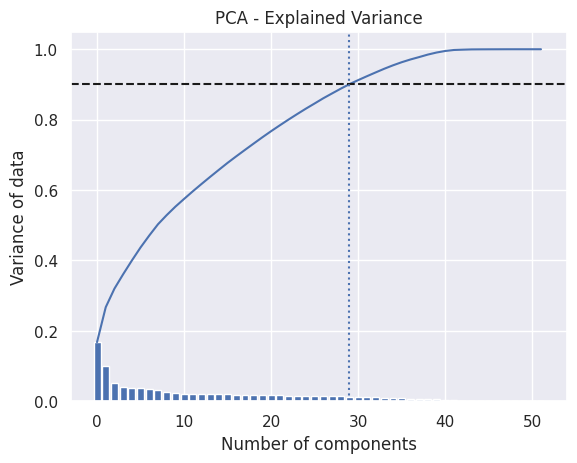

In [ ]:
pca = PCA(threshold = 0.9)
pca.train(train_df)

In [ ]:
# how many principal components did we need to cumulatively explain 90% of the variance?

pca.threshold

30

In [ ]:
# now let's test the model

pca.predict(test_df)

Text(0.5, 0.98, 'Fault Free Conditions')

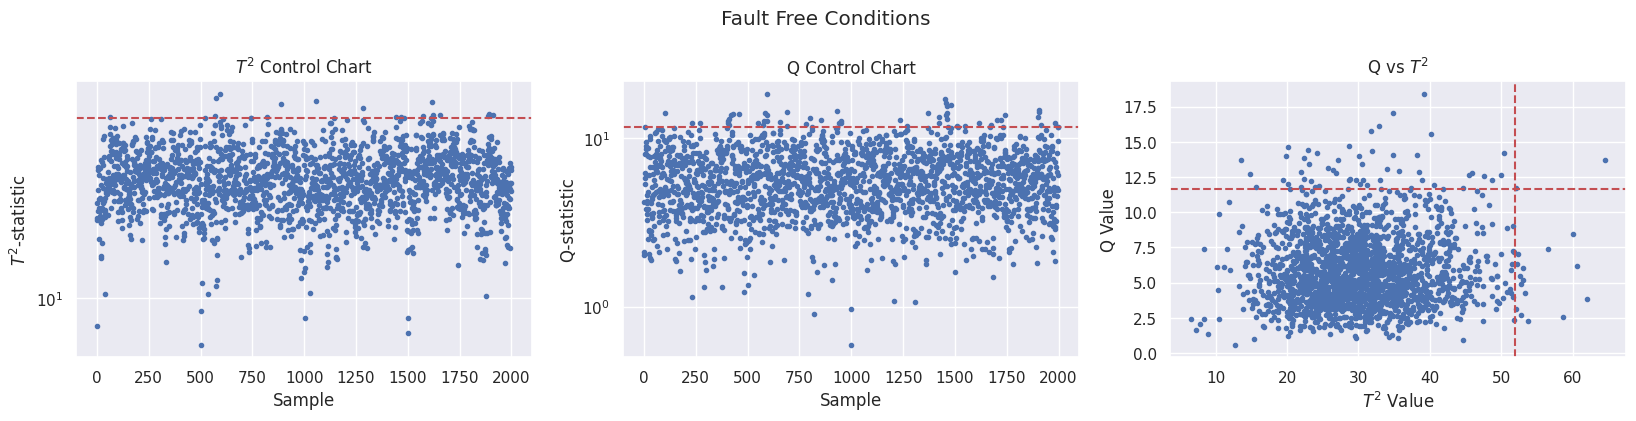

In [ ]:
pca.plot_control_charts()
plt.suptitle('Fault Free Conditions')


In [ ]:
# false alarm rate
# points that fell above the red line even when there are no faults

print('False alarm rate\n--------------')

print(f'T2: {(pca.T2>pca.T2_lim).sum()/pca.T2.shape[0]}')
print(f'Q: {(pca.Q>pca.Q_lim).sum()/pca.Q.shape[0]}')

# we chose the condfidence level to be 99%, so we can expect around 1% false alarm

False alarm rate
--------------
T2: 0.0085
Q: 0.027


In [ ]:
Q_threshold = pca.Q_lim
false_df = train_df_complete[(train_df_complete.faultNumber==0) & (train_df_complete.simulationRun.isin(range(46,50)))].iloc[:,3:]
pca.predict(false_df)
pca.Q

array([1.78756373, 1.68285278, 9.40687791, ..., 8.74821426, 9.25702527,
       9.11873446])

In [ ]:
len(np.where(pca.Q > Q_threshold))*100/len(pca.Q)

2000

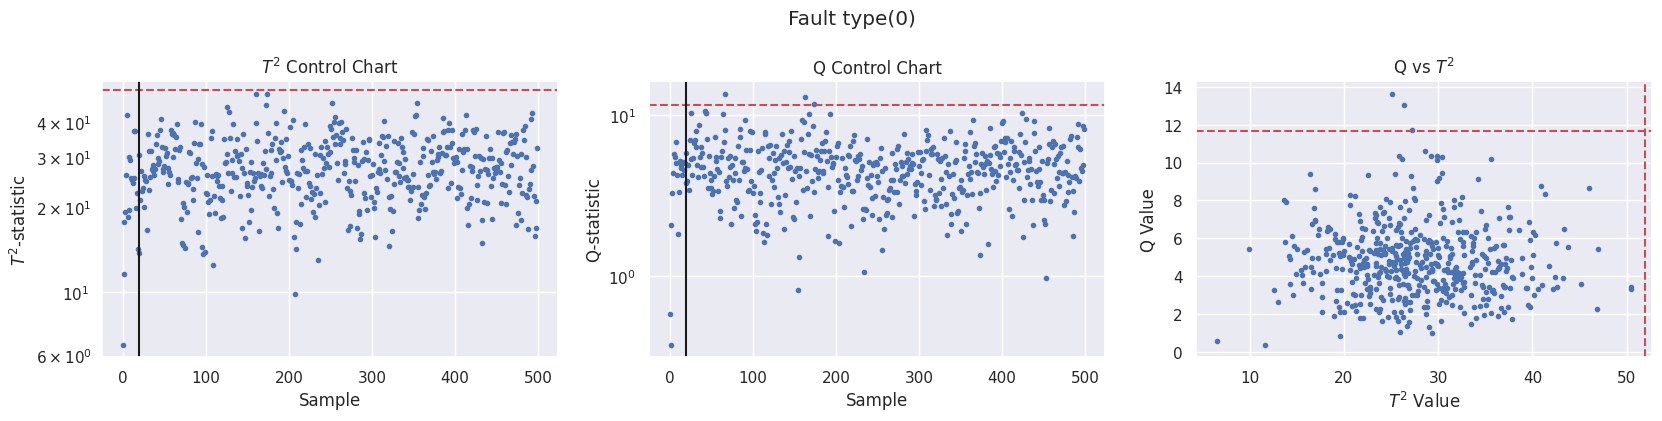

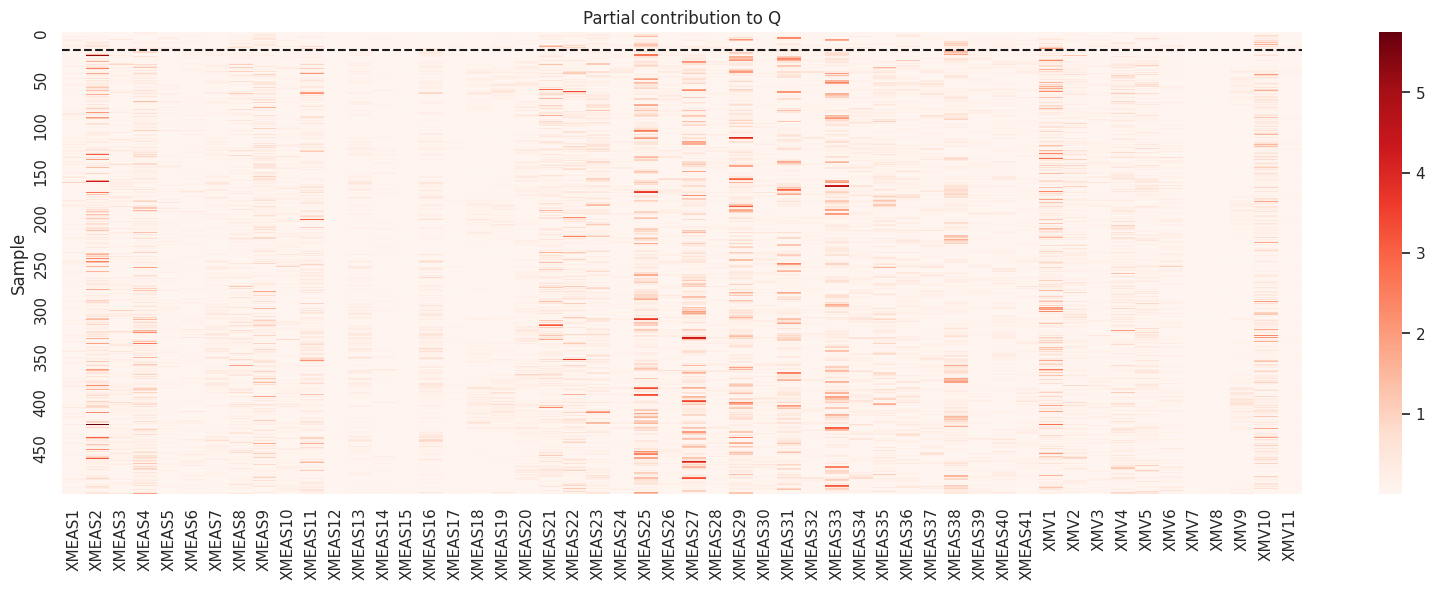

In [ ]:
faultnum = 0

train_df = train_df_complete[(train_df_complete.faultNumber==0) & (train_df_complete.simulationRun==1)].iloc[:,3:]
pca.predict(train_df)

pca.plot_control_charts(fault=20)
plt.suptitle(f'Fault type({faultnum})');

pca.plot_contributions(fault=20, columns = train_df.columns)

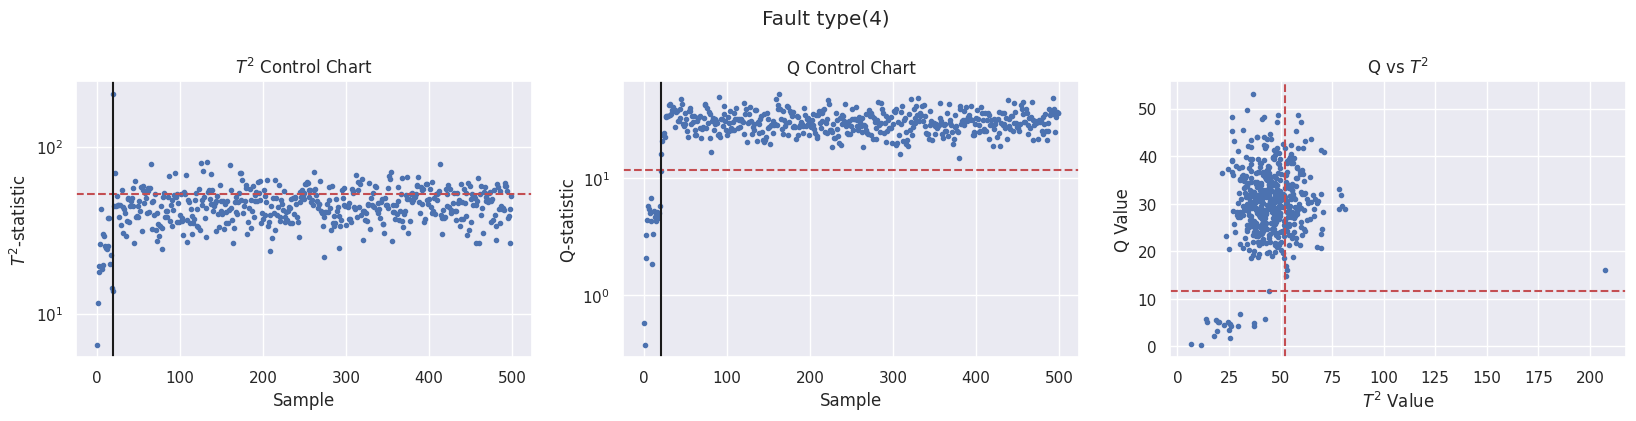

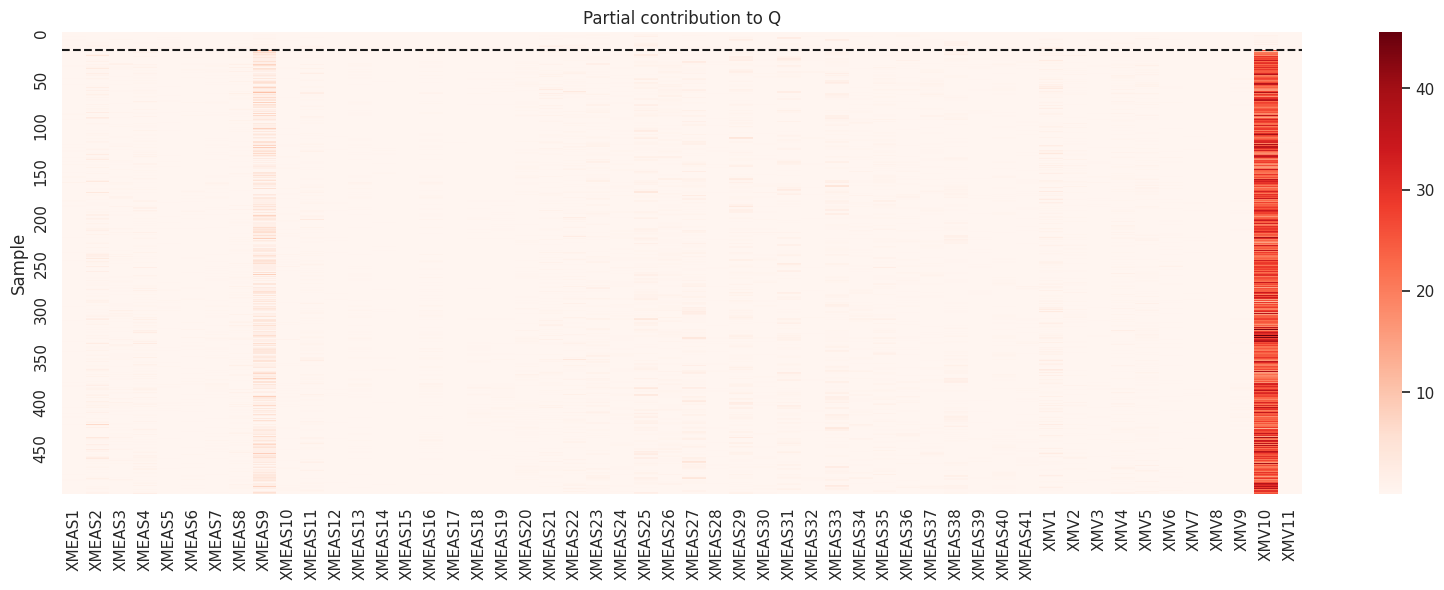

In [ ]:
faultnum = 4

test_df = test_df_complete[(test_df_complete.faultNumber==faultnum) & (test_df_complete.simulationRun==1)].iloc[:,3:]
pca.predict(test_df)

pca.plot_control_charts(fault=20)
plt.suptitle(f'Fault type({faultnum})');

pca.plot_contributions(fault=20, columns = test_df.columns)

In [ ]:
for faultnum in range(1,21):
#custom_signatures = [1,2,4,6]
#for faultnum in custom_signatures:
    test_df = test_df_complete[(test_df_complete.faultNumber==faultnum) & (test_df_complete.simulationRun==1)].iloc[:,3:]
    pca.predict(test_df)

    pca.plot_control_charts(fault=20)
    plt.suptitle(f'IDV({faultnum})');

    pca.plot_contributions(fault=20, columns = test_df.columns)



Output hidden; open in https://colab.research.google.com to view.